<a href="https://colab.research.google.com/github/jadamccallum/springboard/blob/main/TreesNForests_MiniPorject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [3]:
from google.colab import files
uploaded = files.upload()

Saving breast+cancer+wisconsin+diagnostic.zip to breast+cancer+wisconsin+diagnostic.zip


In [6]:
import zipfile
import os
zip_path = "breast+cancer+wisconsin+diagnostic.zip"
extract_path = "breast_cancer_data"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Current directory files:", os.listdir())

Current directory files: ['.config', 'breast_cancer_data', 'breast+cancer+wisconsin+diagnostic.zip', 'sample_data']


In [7]:
print("Extracted files:", os.listdir("breast_cancer_data"))

Extracted files: ['wdbc.data', 'wdbc.names']


In [8]:
data_file = "breast_cancer_data/wdbc.data"
df = pd.read_csv(data_file, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
column_names = [
     "ID" ,"Diagnosis", "Radius_mean", "Texture_mean", "Perimeter_mean", "Area_mean", "Smoothness_mean",
    "Compactness_mean", "Concavity_mean", "Concave points_mean", "Symmetry_mean", "Fractal_dimension_mean",
    "Radius_se", "Texture_se", "Perimeter_se", "Area_se", "Smoothness_se", "Compactness_se",
    "Concavity_se", "Concave points_se", "Symmetry_se", "Fractal_dimension_se",
    "Radius_worst", "Texture_worst", "Perimeter_worst", "Area_worst", "Smoothness_worst",
    "Compactness_worst", "Concavity_worst", "Concave points_worst", "Symmetry_worst", "Fractal_dimension_worst"
]
print("Number of columns in df:", df.shape[1])

Number of columns in df: 32


In [22]:
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"].map({"M": 1, "B": 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (455, 31) (455,)
Testing set shape: (114, 31) (114,)


In [25]:
print("First 5 rows of x_train:")
print(X_train.head())

print("\nFirst 5 rows of y_train:")
print(y_train.head())

First 5 rows of x_train:
           ID  Radius_mean  Texture_mean  Perimeter_mean  Area_mean  \
68     859471        9.029         17.33           58.79      250.5   
181    873593       21.090         26.57          142.70     1311.0   
63     859196        9.173         13.86           59.20      260.9   
248  88466802       10.650         25.22           68.01      347.0   
60     858970       10.170         14.88           64.55      311.9   

     Smoothness_mean  Compactness_mean  Concavity_mean  Concave points_mean  \
68           0.10660           0.14130         0.31300              0.04375   
181          0.11410           0.28320         0.24870              0.14960   
63           0.07721           0.08751         0.05988              0.02180   
248          0.09657           0.07234         0.02379              0.01615   
60           0.11340           0.08061         0.01084              0.01290   

     Symmetry_mean  ...  Radius_worst  Texture_worst  Perimeter_worst  \


In [27]:
print("\nFirst 5 rows of x_test:")
print(X_test.head())
print("\nFirst 5 rows of y_test:")
print(y_test.head())


First 5 rows of x_test:
         ID  Radius_mean  Texture_mean  Perimeter_mean  Area_mean  \
204   87930        12.47         18.60           81.09      481.9   
70   859575        18.94         21.31          123.60     1130.0   
131    8670        15.46         19.48          101.70      748.9   
431  907915        12.40         17.68           81.47      467.8   
540  921385        11.54         14.44           74.65      402.9   

     Smoothness_mean  Compactness_mean  Concavity_mean  Concave points_mean  \
204          0.09965            0.1058         0.08005              0.03821   
70           0.09009            0.1029         0.10800              0.07951   
131          0.10920            0.1223         0.14660              0.08087   
431          0.10540            0.1316         0.07741              0.02799   
540          0.09984            0.1120         0.06737              0.02594   

     Symmetry_mean  ...  Radius_worst  Texture_worst  Perimeter_worst  \
204         

In [28]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)
print((X_train1 == X_train2).all().all())

True


In [30]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

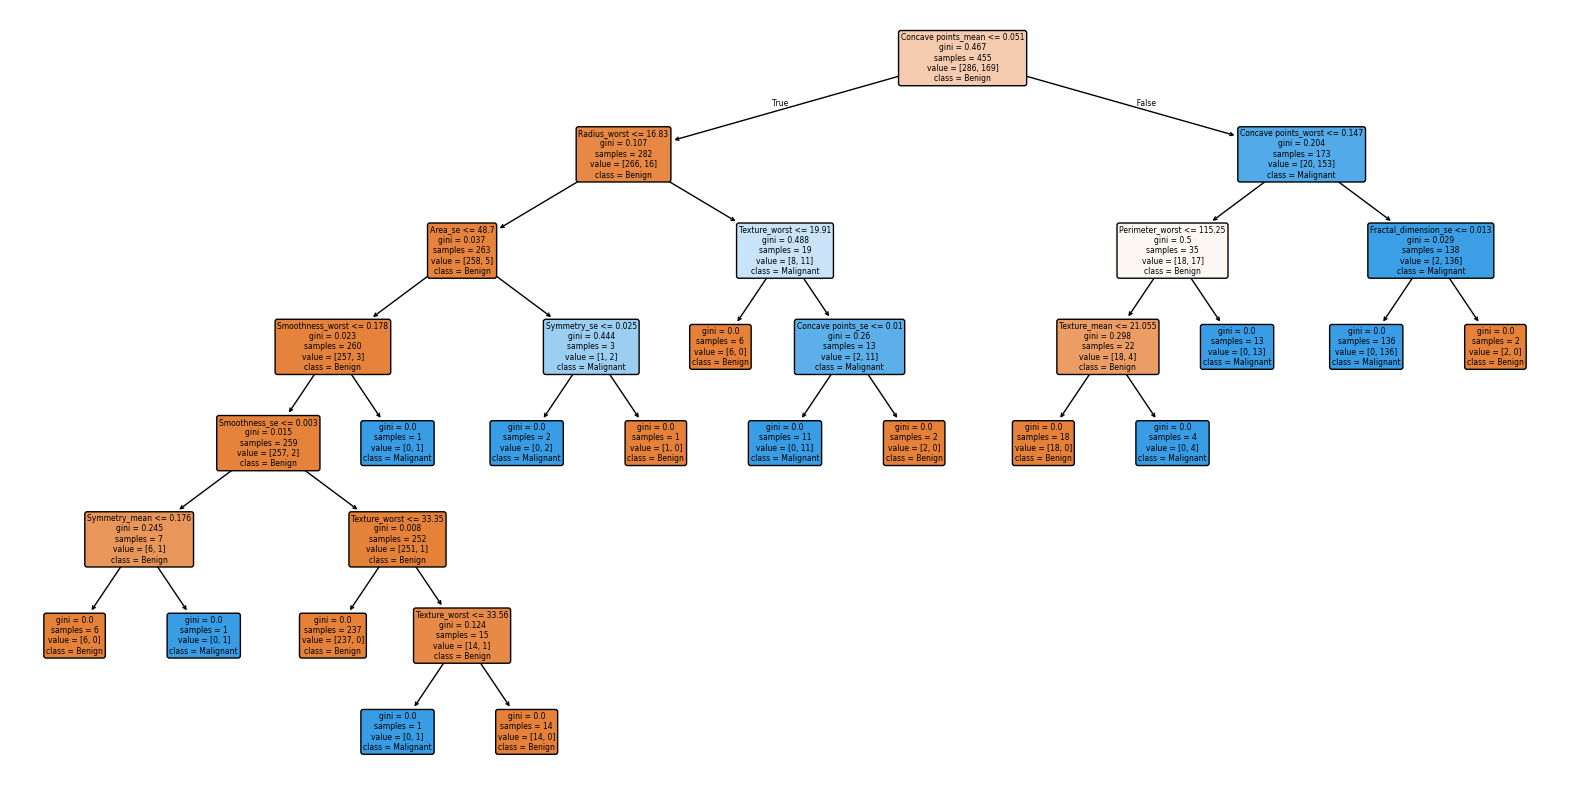

In [32]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=["Benign", "Malignant"], filled=True, rounded=True)
plt.show()

In [35]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
y_pred_rf = rf_model.predict(X_test)
print("First 5 Predictions:", y_pred_rf[:5])

First 5 Predictions: [0 1 1 0 0]


In [43]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
print(feature_importance)

Perimeter_worst            0.132452
Area_worst                 0.125414
Concave points_worst       0.108197
Radius_worst               0.097972
Concave points_mean        0.086885
Concavity_worst            0.052983
Concavity_mean             0.050980
Perimeter_mean             0.050843
Area_mean                  0.040561
Area_se                    0.034258
Radius_mean                0.026505
Compactness_worst          0.019492
Compactness_mean           0.018098
Perimeter_se               0.017197
Texture_worst              0.015477
Symmetry_worst             0.014337
Radius_se                  0.013504
Texture_mean               0.012867
Smoothness_worst           0.011507
Concavity_se               0.008939
Smoothness_mean            0.007500
Fractal_dimension_worst    0.006813
Fractal_dimension_se       0.006808
Compactness_se             0.006565
Symmetry_se                0.005699
Texture_se                 0.005308
Concave points_se          0.005271
Fractal_dimension_mean     0

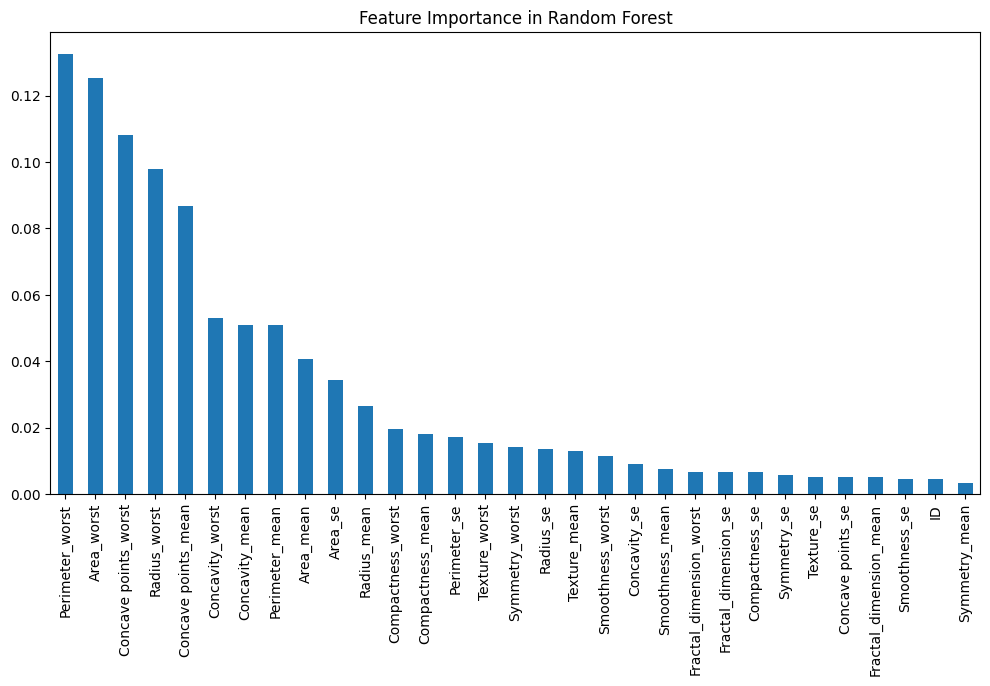

In [44]:
feature_importance.sort_values(ascending=False).plot(kind="bar", figsize=(12,6))
plt.title("Feature Importance in Random Forest")
plt.show()

In [45]:
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [47]:
y_pred_ada = adaboost_model.predict(X_test)
print("First 5 Predictions:", y_pred_ada[:5])

First 5 Predictions: [0 1 1 0 0]


In [48]:
ada_accuracy = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Model Accuracy: {ada_accuracy:.2f}")

AdaBoost Model Accuracy: 0.96


In [49]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {rf_accuracy:.2f}")

Random Forest Model Accuracy: 0.96


In [52]:
y_pred_dt = model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Model Accuracy: {dt_accuracy:.2f}")

Decision Tree Model Accuracy: 0.94
